In [1]:
### PSTH of neurons in regards to specific behaviors

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import os
import import_ipynb
import func_format
import func_analysis
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib.gridspec as gridspec
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

importing Jupyter notebook from func_format.ipynb
importing Jupyter notebook from func_analysis.ipynb


In [2]:
savepath = 'F:/PSTH_results/'
func_format.foldercheck(savepath)

In [223]:
results = np.zeros(8)
ratID = ['Amygdala6', 'Amygdala8', 'Amygdala10', 'Amygdala11']
date = ['13042019', '01102019', '27062020', '06072020']
behaviorlist = ['headhead', 'headtail', 'approach', 'following', 'conspecific']
behaviorrange = np.arange(2, 12, 2)
responsetype = np.loadtxt('F:/ResponseType/ResponseType_BLA/responseprofile.csv', delimiter = ',', dtype = str)

headheadzscore_male = np.zeros(2003)
headtailzscore_male = np.zeros(2003)
approachzscore_male = np.zeros(2003)
conspecificzscore_male = np.zeros(2003)
followingzscore_male = np.zeros(2003)

headheadzscore_female = np.zeros(2003)
headtailzscore_female = np.zeros(2003)
approachzscore_female = np.zeros(2003)
conspecificzscore_female = np.zeros(2003)
followingzscore_female = np.zeros(2003)

rawvalues_male = np.zeros(2003)
rawvalues_female = np.zeros(2003)

psthresultssave = ['RatID', 'Date', 'Neuronname', 'Neurontype']

for r, rat in enumerate(ratID):
    directory = os.listdir('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_sexspecific/')
    print(rat)
    for i, file in enumerate(directory):
        if file[-17:] == '_average_male.csv':
            #print(file)
            neuronname = file[:-17]
            averagetrace = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_sexspecific/'+neuronname+'_average_male.csv', delimiter = ',', dtype = str)
            averagetrace = np.array(averagetrace[1:,1:], np.float)
            neurontype = responsetype[np.where((responsetype[:,0] == rat) & (responsetype[:,2] == neuronname))][0][4]
            behaviorresults = []
            
            if neurontype != 'male' and neurontype != 'female' and neurontype != 'panresponsive':
                continue
            
            for j, behavior in enumerate(behaviorlist):
                
                actual_male = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_sexspecific/'+neuronname+'_'+behavior+'_rawvalues_male.csv', delimiter = ',')
                actual_male = convolve(np.sum(actual_male, axis = 0), Gaussian1DKernel(np.sqrt(50)), boundary = 'wrap')
                
                actual_female = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_sexspecific/'+neuronname+'_'+behavior+'_rawvalues_female.csv', delimiter = ',')
                actual_female = convolve(np.sum(actual_female, axis = 0), Gaussian1DKernel(np.sqrt(50)), boundary='wrap')
                
               # minimummax = np.max(averagetrace[behaviorrange[j]])
                #if minimummax < 30:
                    #save = np.hstack((rat, date[r], neuronname, neurontype, 'nan', 'nan', 'nan', 'nan', 'nan'))
                    #behaviorresults = np.append(behaviorresults, 'no sig')
                    #continue
                    
                if behavior == 'headhead':
                    zscoreheadhead = (actual_male-np.mean(actual_male[:600])) / np.std(actual_male[:600])
                    headheadzscore_male = np.vstack((headheadzscore_male, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadhead))))
                    
                    zscoreheadhead = (actual_female-np.mean(actual_female[:600])) / np.std(actual_female[:600])
                    headheadzscore_female = np.vstack((headheadzscore_female, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadhead))))
                    
                    rawvalues_male = np.vstack((rawvalues_male, np.hstack((rat, date[r], neuronname, neurontype, actual_male))))
                    rawvalues_female = np.vstack((rawvalues_female, np.hstack((rat, date[r], neuronname, neurontype, actual_female))))
                    
                if behavior == 'headtail':
                    zscoreheadtail = (actual_male-np.mean(actual_male[:600])) / np.std(actual_male[:600])
                    headtailzscore_male = np.vstack((headtailzscore_male, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadtail))))
                    
                    zscoreheadtail = (actual_female-np.mean(actual_female[:600])) / np.std(actual_female[:600])
                    headtailzscore_female = np.vstack((headtailzscore_female, np.hstack((rat, date[r], neuronname, neurontype, zscoreheadtail))))
                if behavior == 'approach':
                    zscoreapproach = (actual_male-np.mean(actual_male[:600])) / np.std(actual_male[:600])
                    approachzscore_male = np.vstack((approachzscore_male, np.hstack((rat, date[r], neuronname, neurontype, zscoreapproach))))
                    
                    zscoreapproach = (actual_female-np.mean(actual_female[:600])) / np.std(actual_female[:600])
                    approachzscore_female = np.vstack((approachzscore_female, np.hstack((rat, date[r], neuronname, neurontype, zscoreapproach))))
                if behavior == 'conspecific':
                    zscoreconspecific = (actual_male-np.mean(actual_male[:600])) / np.std(actual_male[:600])
                    conspecificzscore_male = np.vstack((conspecificzscore_male, np.hstack((rat, date[r], neuronname, neurontype, zscoreconspecific))))
                    
                    zscoreconspecific = (actual_female-np.mean(actual_female[:600])) / np.std(actual_female[:600])
                    conspecificzscore_female = np.vstack((conspecificzscore_female, np.hstack((rat, date[r], neuronname, neurontype, zscoreconspecific))))
                if behavior == 'following':
                    zscorefollowing = (actual_male-np.mean(actual_male[:600])) / np.std(actual_male[:600])
                    followingzscore_male = np.vstack((followingzscore_male, np.hstack((rat, date[r], neuronname, neurontype, zscorefollowing))))
                    
                    zscorefollowing = (actual_female-np.mean(actual_female[:600])) / np.std(actual_female[:600])
                    followingzscore_female = np.vstack((followingzscore_female, np.hstack((rat, date[r], neuronname, neurontype, zscorefollowing))))
                        
            psthresultssave = np.vstack((psthresultssave, np.hstack((rat, date[r], neuronname, neurontype))))
            
                    
                    
                    
headheadzscore_male = headheadzscore_male[1:]
headtailzscore_male = headtailzscore_male[1:]
approachzscore_male = approachzscore_male[1:]
conspecificzscore_male = conspecificzscore_male[1:]
followingzscore_male = followingzscore_male[1:]

headheadzscore_female = headheadzscore_female[1:]
headtailzscore_female = headtailzscore_female[1:]
approachzscore_female = approachzscore_female[1:]
conspecificzscore_female = conspecificzscore_female[1:]
followingzscore_female = followingzscore_female[1:]

rawvalues_male = rawvalues_male[1:]
rawvalues_female = rawvalues_female[1:]

Amygdala6
Amygdala8
Amygdala10
Amygdala11


In [224]:
ids = np.array(rawvalues_male[:,:4])
values_male = np.array(rawvalues_male[:,4:], float)
values_female = np.array(rawvalues_female[:,4:], float)


In [246]:
malespecific_norm = values_male[ids[:,-1] == 'male']/np.max(values_male[ids[:,-1] == 'male'], axis = 1).reshape(-1,1)
femalespecific_norm = values_female[ids[:,-1] == 'female']/np.max(values_female[ids[:,-1] == 'female'], axis = 1).reshape(-1,1)

In [248]:
sortordermale = np.argsort(np.max(malespecific_norm[:,1000:1200], axis = 1))
sortedmalespecific_norm = np.take_along_axis(malespecific_norm, sortordermale.reshape(len(sortordermale), 1), axis = 0)
sortedmalespecific_normfemale = np.take_along_axis(values_female[ids[:,-1] == 'male']/np.max(values_male[ids[:,-1] == 'male'], axis = 1).reshape(-1,1), sortordermale.reshape(len(sortordermale), 1), axis = 0)

sortorderfemale = np.argsort(np.max(femalespecific_norm[:,1000:1200], axis = 1))
sortedfemalespecific_norm = np.take_along_axis(femalespecific_norm, sortorderfemale.reshape(len(sortorderfemale),1), axis = 0)
sortedfemalespecific_normmale = np.take_along_axis(values_male[ids[:,-1] == 'female']/np.max(values_female[ids[:,-1] == 'female'], axis = 1).reshape(-1,1), sortorderfemale.reshape(len(sortorderfemale), 1), axis = 0)

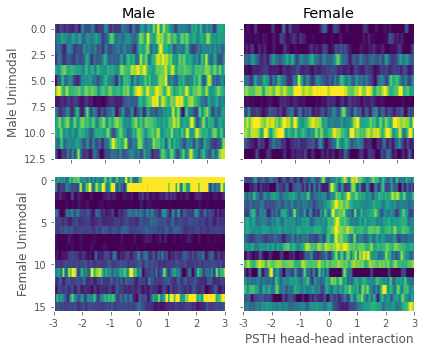

In [288]:
fig, ax = plt.subplots(2,2, sharey = 'row', sharex = True, figsize = (6, 5))

ax[0,0].imshow(np.flip(sortedmalespecific_norm,axis = 0), aspect = 'auto', vmax = 1, vmin = 0, interpolation = 'None')
ax[0,0].grid(False)
ax[0,1].imshow(np.flip(sortedmalespecific_normfemale, axis = 0), aspect = 'auto', vmax = 1, vmin = 0, interpolation = 'None')
ax[0,1].grid(False)

ax[1,0].imshow(np.flip(sortedfemalespecific_normmale, axis = 0), aspect = 'auto', vmax = 1, vmin = 0, interpolation = 'None')
ax[1,0].grid(False)
ax[1,1].imshow(np.flip(sortedfemalespecific_norm, axis = 0), aspect = 'auto', vmax = 1, vmin = 0, interpolation = 'None')
ax[1,1].grid(False)

ax[1,1].set_xlim(500, 1500)

ax[0,0].set_title('Male')
ax[0,1].set_title('Female')

ax[1,1].set_xticks((400, 600, 800, 1000, 1200, 1400, 1600))
ax[1,0].set_xticks((400, 600, 800, 1000, 1200, 1400, 1600))

ax[1,1].set_xticklabels((-3, -2, -1, 0, 1, 2, 3))

ax[1,1].set_xlabel('PSTH head-head interaction')

ax[0,0].set_ylabel('Male Unimodal')
ax[1,0].set_ylabel('Female Unimodal')

plt.tight_layout()
plt.savefig('F:/unimodalonly_PSTHheadhead_normalizedtopreferredsex.png', dpi = 300)

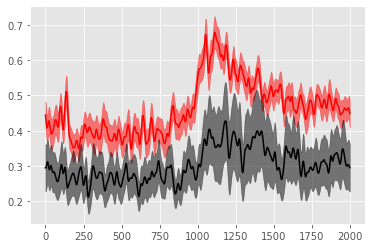

In [286]:
plt.plot(np.mean(np.vstack((sortedmalespecific_norm, sortedfemalespecific_norm)), axis = 0), color = 'red')
plt.plot(np.mean(np.vstack((sortedmalespecific_normfemale, sortedfemalespecific_normmale)), axis = 0), color = 'black')

plt.fill_between(np.arange(0, len(sortedmalespecific_norm[0])), 
                 np.mean(np.vstack((sortedmalespecific_norm, sortedfemalespecific_norm)), axis = 0)+stats.sem(np.vstack((sortedmalespecific_norm, sortedfemalespecific_norm)), axis = 0),
                np.mean(np.vstack((sortedmalespecific_norm, sortedfemalespecific_norm)), axis = 0)-stats.sem(np.vstack((sortedmalespecific_norm, sortedfemalespecific_norm)), axis = 0),
                color = 'red', alpha = 0.5)

plt.fill_between(np.arange(0, len(sortedmalespecific_norm[0])),
                np.mean(np.vstack((sortedmalespecific_normfemale, sortedfemalespecific_normmale)), axis = 0)+stats.sem(np.vstack((sortedmalespecific_normfemale, sortedfemalespecific_normmale)), axis = 0),
                np.mean(np.vstack((sortedmalespecific_normfemale, sortedfemalespecific_normmale)), axis = 0)-stats.sem(np.vstack((sortedmalespecific_normfemale, sortedfemalespecific_normmale)), axis = 0),
                color = 'black', alpha = 0.5)

In [277]:
def sortplot_psthsummary(zscore_1, zscore_2):

    zscorevalues1 = np.array(zscore_1[:,4:], float)
    zscoreids = np.array(zscore_1[:,:4])
    zscorevalues2 = np.array(zscore_2[:,4:], float)

    sortorder = np.argsort(np.max(zscorevalues1[:,1000:1200], axis = 1))
    sortedvalues1 = np.take_along_axis(zscorevalues1, sortorder.reshape(len(sortorder), 1), axis = 0)
    sortedvalues2 = np.take_along_axis(zscorevalues2, sortorder.reshape(len(sortorder), 1), axis = 0)
    sortedids = np.take_along_axis(zscoreids, sortorder.reshape(len(sortorder), 1), axis = 0)

    fig, ax = plt.subplots(1, 2, figsize = (5,3), sharex = True, sharey = True)

    ax[0].imshow(sortedvalues1, aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr', interpolation = 'None')
    ax[0].set_ylim(-.5, len(sortorder)-.5)
    ax[0].grid(False)
    ax[0].set_ylabel('Neuron #')
    ax[0].set_xticks((0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000))
    ax[0].set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax[0].set_xlabel('Time (s)')
    
    ax[1].imshow(sortedvalues2, aspect = 'auto', vmin = -5, vmax = 5, cmap = 'bwr', interpolation = 'None')
    ax[1].set_ylim(-.5, len(sortorder)-.5)
    ax[1].grid(False)
    ax[1].set_ylabel('Neuron #')
    ax[1].set_xticks((0,200,400,600,800,1000,1200,1400,1600,1800,2000))
    ax[1].set_xticklabels((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax[1].set_xlabel('Time (s)')
    plt.tight_layout()
    
    ax[1].set_xlim(600, 1400)
    
    ax[0].set_title('Preferred Sex')
    ax[1].set_title('Other')
    plt.tight_layout()
    #plt.show()
    
    return(fig, sortedids, sortedvalues1, sortedvalues2)

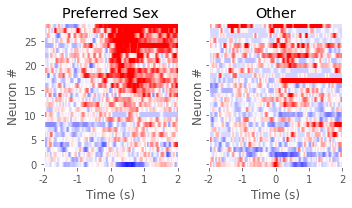

In [278]:
ids = psthresultssave[1:]
plt.rcParams['svg.fonttype'] = 'none'
[headheadfig, malesortedids, male_malesorted, female_malesorted] = sortplot_psthsummary(np.vstack((headheadzscore_male[ids[:,-1] == 'male'], headheadzscore_female[ids[:,-1] == 'female'])), np.vstack((headheadzscore_female[ids[:,-1] == 'male'], headheadzscore_male[ids[:,-1] == 'female'])))
headheadfig.savefig('F:/unimodal_headheadPSTH_zscoredindependently.png', dpi = 300)

#[headheadfig2, femalesortedids, female_femalesorted, male_femalesorted] = sortplot_psthsummary(headheadzscore_female[ids[:,-1] == 'female'], headheadzscore_male[ids[:,-1] == 'female'])
#[headheadfig3, malepansortedids, male_pansorted, female_pansorted] = sortplot_psthsummary(headheadzscore_female[ids[:,-1] == 'panresponsive'], headheadzscore_male[ids[:,-1] == 'panresponsive'])


#headheadfig.savefig(savepath+savetype+'headhead_zscore.svg', format = 'svg', dpi = 500, transparent = True)
#headtailfig = sortplot_psthsummary(headtailzscore_male, headtailzscore_female)
#headtailfig.savefig(savepath+savetype+'headtail_zscore.svg', format = 'svg', dpi = 500, transparent = True)
#approachfig = sortplot_psthsummary(approachzscore_male, approachzscore_female)
#approachfig.savefig(savepath+savetype+'approach_zscore.svg', format = 'svg', dpi = 500, transparent = True)
#followingfig = sortplot_psthsummary(followingzscore_male, followingzscore_female)
#followingfig.savefig(savepath+savetype+'following_zscore.svg', format = 'svg', dpi = 500, transparent = True)
#conspecificfig = sortplot_psthsummary(conspecificzscore_male, conspecificzscore_female)
#conspecificfig.savefig(savepath+savetype+'conspecific_zscore.svg', format = 'svg', dpi = 500, transparent = True)

In [123]:
malesig_male = male_malesorted[np.max(male_malesorted[:,1000:1200], axis = 1) > 5]
femalesig_male = female_malesorted[np.max(male_malesorted[:,1000:1200], axis = 1) > 5]

femalesig_female = female_femalesorted[np.max(female_femalesorted[:,1000:1200], axis = 1) > 5]
malesig_female = male_femalesorted[np.max(female_femalesorted[:,1000:1200], axis = 1) > 5]

malesig_pan = male_pansorted[np.where((np.max(male_pansorted[:,1000:1200], axis = 1) > 5) | (np.max(female_pansorted[:,1000:1200], axis = 1) > 5))]
femalesig_pan = female_pansorted[np.where((np.max(male_pansorted[:,1000:1200], axis = 1) > 5) | (np.max(female_pansorted[:,1000:1200], axis = 1) > 5))]

(500.0, 1500.0)

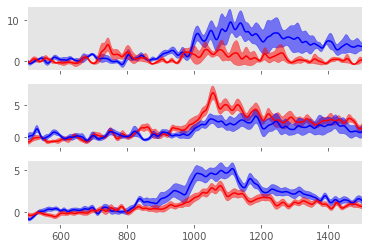

In [128]:
fig, ax = plt.subplots(3, sharex = True)

ax[0].plot(np.mean(malesig_male, axis = 0), color = 'blue')
ax[0].plot(np.mean(femalesig_male, axis = 0), color = 'red')
ax[0].fill_between((np.arange(0, len(malesig_male[0]))), np.mean(malesig_male, axis = 0)-stats.sem(malesig_male, axis = 0), np.mean(malesig_male, axis = 0)+stats.sem(malesig_male, axis = 0), color = 'blue', alpha = 0.5)
ax[0].fill_between((np.arange(0, len(femalesig_male[0]))), np.mean(femalesig_male, axis = 0)-stats.sem(femalesig_male, axis = 0), np.mean(femalesig_male, axis = 0)+stats.sem(femalesig_male, axis = 0), color = 'red', alpha = 0.5)

ax[1].plot(np.mean(femalesig_female, axis = 0), color = 'red')
ax[1].plot(np.mean(malesig_female, axis = 0), color = 'blue')
ax[1].fill_between((np.arange(0, len(femalesig_female[0]))), np.mean(femalesig_female, axis = 0)-stats.sem(femalesig_female, axis = 0), np.mean(femalesig_female, axis = 0)+stats.sem(femalesig_female, axis = 0), color = 'red', alpha = 0.5)
ax[1].fill_between((np.arange(0, len(malesig_female[0]))), np.mean(malesig_female, axis = 0)-stats.sem(malesig_female, axis = 0), np.mean(malesig_female, axis = 0)+stats.sem(malesig_female, axis = 0), color = 'blue', alpha = 0.5)

ax[2].plot(np.mean(malesig_pan, axis = 0), color = 'blue')
ax[2].plot(np.mean(femalesig_pan, axis = 0), color= 'red')
ax[2].fill_between((np.arange(0, len(malesig_pan[0]))), np.mean(malesig_pan, axis = 0)-stats.sem(malesig_pan, axis = 0), np.mean(malesig_pan, axis = 0)+stats.sem(malesig_pan, axis = 0), color = 'blue', alpha = 0.5)
ax[2].fill_between((np.arange(0, len(femalesig_pan[0]))), np.mean(femalesig_pan, axis = 0)-stats.sem(femalesig_pan, axis = 0), np.mean(femalesig_pan, axis = 0)+stats.sem(femalesig_pan, axis = 0), color = 'red', alpha = 0.5)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)

ax[0].set_xlim(500, 1500)

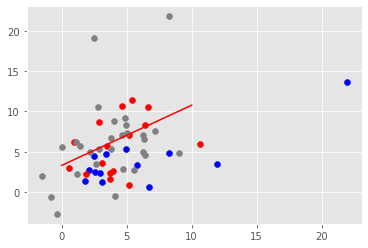

In [185]:
plt.scatter(np.max(male_malesorted[:,1000:1200], axis = 1), np.max(female_malesorted[:,1000:1200], axis = 1), color = 'blue')
plt.scatter(np.max(male_femalesorted[:,1000:1200], axis = 1), np.max(female_femalesorted[:,1000:1200], axis = 1), color = 'red')
plt.scatter(np.max(male_pansorted[:,1000:1200], axis = 1), np.max(female_pansorted[:,1000:1200], axis = 1),color = 'gray')

#plt.xlim(-5, 15)
#plt.ylim(-5, 15)

#x = np.max(male_malesorted[:,1000:1200], axis = 1)
#y = np.max(female_malesorted[:,1000:1200], axis = 1)

#model = LinearRegression(fit_intercept=True)
#model.fit(x[:, np.newaxis], y)
#xfit = np.linspace(0, 10, 1000)
#yfit = model.predict(xfit[:, np.newaxis])
#plt.plot(xfit, yfit, color = 'blue');

x = np.max(male_pansorted[:,1000:1200], axis = 1)
y = np.max(female_pansorted[:,1000:1200], axis = 1)

model = LinearRegression()
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color = 'red');

In [168]:
xfit

array([ 1.815,  2.057,  2.514,  2.52 ,  2.942,  3.058,  3.402,  4.973,
        5.81 ,  6.707,  8.237, 11.944, 21.926])

In [170]:
np.ravel(yfit)

array([ 1.332,  2.675,  4.4  ,  2.501,  2.306,  1.25 ,  4.681,  5.373,
        3.302,  0.634,  4.85 ,  3.528, 13.701])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

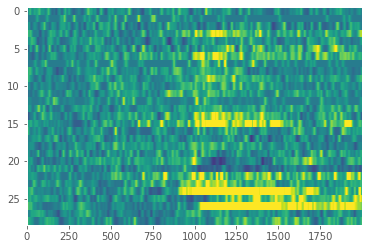

In [62]:
plt.imshow(np.array(headheadzscore_male[:,4:], float), aspect = 'auto', vmin = -5, vmax = 5, interpolation = 'None')
plt.grid(False)

In [72]:
headheadmale = np.array(headheadzscore_male[:,4:], float)
headheadfemale = np.array(headheadzscore_female[:,4:], float)

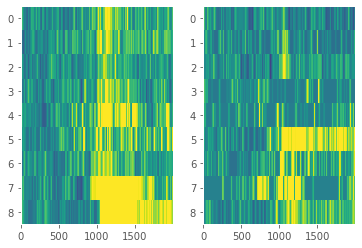

In [78]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(headheadmale[np.mean(headheadmale[:,1000:1200], axis = 1) > 2], aspect = 'auto', vmin = -5, vmax = 5, interpolation = 'None')
ax[1].imshow(headheadfemale[np.mean(headheadmale[:,1000:1200], axis = 1) > 2], aspect = 'auto', vmin = -5, vmax = 5, interpolation = 'None')

ax[0].grid(False)
ax[1].grid(False)

In [80]:
ids[np.mean(headheadmale[:,1000:1200], axis = 1) > 2]

array([['Amygdala6', '13042019', '14A', 'male'],
       ['Amygdala6', '13042019', '22C', 'male'],
       ['Amygdala6', '13042019', '2A', 'female'],
       ['Amygdala6', '13042019', '41A', 'male'],
       ['Amygdala6', '13042019', '42B', 'male'],
       ['Amygdala8', '01102019', '54B', 'female'],
       ['Amygdala10', '27062020', '105B', 'female'],
       ['Amygdala10', '27062020', '33B', 'male'],
       ['Amygdala10', '27062020', '50A', 'female']], dtype='<U10')

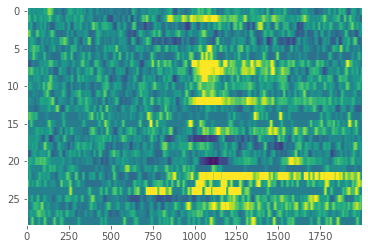

In [61]:
plt.imshow(np.array(headheadzscore_female[:,4:], float), aspect = 'auto', vmin = -5, vmax = 5, interpolation = 'None')
plt.grid(False)

In [6]:
allunits = len(psthresultssave[1:,4])
headhead_pos = np.count_nonzero(psthresultssave[1:,4] == 'sig+')
headhead_neg = np.count_nonzero(psthresultssave[1:,4] == 'sig-')
headhead_no = (allunits - headhead_pos - headhead_neg)/allunits
headtail_pos = np.count_nonzero(psthresultssave[1:,5] == 'sig+')
headtail_neg = np.count_nonzero(psthresultssave[1:,5] == 'sig-')
headtail_no = (allunits - headtail_pos - headtail_neg)/allunits
approach_pos = np.count_nonzero(psthresultssave[1:,6] == 'sig+')
approach_neg = np.count_nonzero(psthresultssave[1:,6] == 'sig-')
approach_no = (allunits - approach_pos - approach_neg)/allunits
following_pos = np.count_nonzero(psthresultssave[1:,7] == 'sig+')
following_neg = np.count_nonzero(psthresultssave[1:,7] == 'sig-')
following_no = (allunits - following_pos - following_neg)/allunits
conspecific_pos = np.count_nonzero(psthresultssave[1:,8] == 'sig+')
conspecific_neg = np.count_nonzero(psthresultssave[1:,8] == 'sig-')
conspecific_no = (allunits - conspecific_pos - conspecific_neg)/allunits

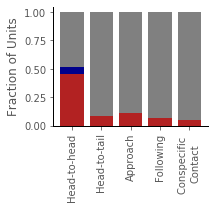

In [7]:
fig, ax = plt.subplots(1, figsize = (3,3))

ax.bar((0,1,2,3,4), (headhead_pos/allunits, headtail_pos/allunits, approach_pos/allunits, following_pos/allunits, conspecific_pos/allunits), color = 'firebrick')
ax.bar((0,1,2,3,4), (headhead_neg/allunits, headtail_neg/allunits, approach_neg/allunits, following_neg/allunits, conspecific_neg/allunits), 
      bottom = (headhead_pos/allunits, headtail_pos/allunits, approach_pos/allunits, following_pos/allunits, conspecific_pos/allunits), color = 'darkblue')
ax.bar((0,1,2,3,4), (headhead_no, headtail_no, approach_no, following_no, conspecific_no),
      bottom = (headhead_pos/allunits+headhead_neg/allunits, headtail_pos/allunits+headtail_neg/allunits, approach_pos/allunits+approach_neg/allunits, following_pos/allunits+following_neg/allunits, conspecific_pos/allunits+conspecific_neg/allunits), color = 'gray')

#ax.set_ylim(0,.3)
#ax.set_yticks((0, .1, .2, .3))
ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(('Head-to-head', 'Head-to-tail', 'Approach', 'Following', 'Conspecific \nContact'), rotation = 90)
ax.set_ylabel('Fraction of Units')
ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
plt.grid(False)
plt.tight_layout()
#plt.savefig(savepath+'Summary_'+savetype+'.svg', format = 'svg', dpi = 500, transparent = True)

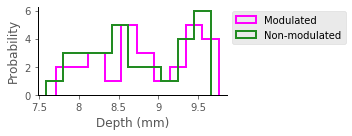

In [14]:
headheadmodulated = psthresultssave[psthresultssave[:,4] == 'sig+']
notheadheadmodulated = psthresultssave[psthresultssave[:,4] == 'no sig']

location = np.loadtxt('F:/ResponseType/ResponseType_BLA_5rats_pyramidal/responseprofilewithlocation.csv', delimiter = ',', dtype = 'str')
location2 = np.loadtxt('F:/ResponseType/ResponseType_BLA_5rats_interneuron/responseprofilewithlocation.csv', delimiter = ',', dtype = str)

location = np.vstack((location, location2))

ap_modulated = []
dv_modulated = []

ap_nonmodulated = []
dv_nonmodulated = []

for i, ii in enumerate(headheadmodulated):
    
    neuron = np.ravel(location[np.where((ii[0] == location[:,0]) & (ii[2] == location[:,2]))])
    ap_modulated = np.append(ap_modulated, np.float(neuron[-4]))
    dv_modulated = np.append(dv_modulated, np.float(neuron[-1]))
    
for j, jj in enumerate(notheadheadmodulated):
    
    neuron = np.ravel(location[np.where((jj[0] == location[:,0]) & (jj[2] == location[:,2]))])
    ap_nonmodulated = np.append(ap_nonmodulated, np.float(neuron[-4]))
    dv_nonmodulated = np.append(dv_nonmodulated, np.float(neuron[-1]))
    
fig, ax = plt.subplots(1, figsize = (5,2))

ax.hist(dv_modulated, histtype = 'step', color = 'magenta', lw = 2)
ax.hist(dv_nonmodulated, histtype = 'step', color = 'forestgreen', lw = 2)
ax.legend(('Modulated', 'Non-modulated'), bbox_to_anchor = (1,1))

ax.set_ylabel('Probability')
ax.set_xlabel('Depth (mm)')
ax.set_xticks((7500, 8000, 8500, 9000, 9500))
ax.set_xticklabels((7.5, 8, 8.5, 9, 9.5))

ax.set_facecolor('white')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
plt.tight_layout()
plt.grid(False)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('F:/Figure4/headhead_location.svg', format = 'svg', dpi = 500, transparent = True)
#plt.savefig(savepath+'/Headheadmodulated_location_all.png', dpi = 300)

In [48]:
row[-7]

'99D'

In [78]:
pancount_pos = 0
unicount_pos = 0
othercount_pos = 0

pancount_no = 0
unicount_no = 0
othercount_no = 0

pancount_neg = 0
unicount_neg = 0
othercount_neg = 0

for i, row in enumerate(psthresultssave[1:]):
    
    if np.count_nonzero(row[-5:] == 'sig+') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_pos = pancount_pos + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_pos = unicount_pos + 1
        else:
            othercount_pos = othercount_pos + 1
            
    elif np.count_nonzero(row[-5:] == 'sig-') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_neg = pancount_neg+1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_neg = unicount_neg + 1
        else:
            othercount_neg = othercount_neg + 1
            
    else:
        if row[-6] == 'panresponsive':
            pancount_no = pancount_no + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_no = unicount_no+1
        else:
            othercount_no = othercount_no+1
    

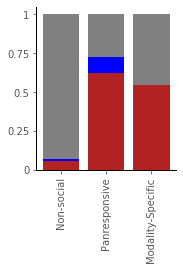

In [81]:
fig, ax = plt.subplots(1, figsize = (2.5, 3))

othertotal = othercount_pos+othercount_no+othercount_neg
pantotal = pancount_pos+pancount_no+pancount_neg
unitotal = unicount_pos+unicount_no+unicount_neg

ax.bar((0,1,2), (othercount_pos/othertotal, pancount_pos/pantotal, unicount_pos/unitotal), color = 'firebrick')
ax.bar((0,1,2), (othercount_neg/othertotal, pancount_neg/pantotal, unicount_neg/unitotal), color = 'blue', bottom = (othercount_pos/othertotal, pancount_pos/pantotal, unicount_pos/unitotal))

ax.bar((0,1,2), (othercount_no/othertotal, pancount_no/pantotal, unicount_no/unitotal), color = 'gray', bottom = ((othercount_pos+othercount_neg)/othertotal, (pancount_pos+pancount_neg)/pantotal, (unicount_pos+unicount_neg)/unitotal))

ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks((0,1,2))
ax.set_xticklabels(('Non-social', 'Panresponsive', 'Modality-Specific'), rotation = 90)

ax.set_yticks((0,.25,.5,.75,1))
ax.set_yticklabels((0,.25,.5,.75,1))

ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('F:/Figure4/summary_neurontype_specificbehaviors.svg', format = 'svg', dpi = 500, transparent = True)

In [57]:
pancount_neg = 0
unicount_neg = 0
othercount_neg = 0

pancount_no = 0
unicount_no = 0
othercount_no = 0

for i, row in enumerate(psthresultssave[1:]):
    
    if np.count_nonzero(row[-5:] == 'sig-') > 0:
        
        if row[-6] == 'panresponsive':
            pancount_neg = pancount_neg + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_neg = unicount_neg + 1
        else:
            othercount_neg = othercount_neg + 1
            
    else:
        if row[-6] == 'panresponsive':
            pancount_no = pancount_no + 1
        elif row[-6] == 'male' or row[-6] == 'female' or row[-6] == 'social':
            unicount_no = unicount_no+1
        else:
            othercount_no = othercount_no+1
    

<BarContainer object of 3 artists>

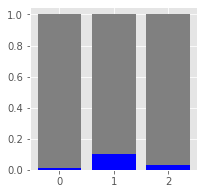

In [58]:
fig, ax = plt.subplots(1, figsize = (3, 3))

ax.bar((0,1,2), (othercount_neg/(othercount_neg+othercount_no), pancount_neg/(pancount_neg+pancount_no), unicount_neg/(unicount_neg+unicount_no)), color = 'blue')
ax.bar((0,1,2), (othercount_no/(othercount_neg+othercount_no), pancount_no/(pancount_neg+pancount_no), unicount_no/(unicount_neg+unicount_no)), bottom = (othercount_neg/(othercount_neg+othercount_no), pancount_neg/(pancount_neg+pancount_no), unicount_neg/(unicount_neg+unicount_no)), color = 'gray')

In [506]:
rocvalue = []
for i, row in enumerate(psthresultssave[1:]):
    rocvalue = np.append(rocvalue, socialbehavior[np.where((socialbehavior[:,1] == row[1]) & (socialbehavior[:,2] == row[2]))][-1][-1])

In [512]:
allsocialresults = np.hstack((psthresultssave[1:], rocvalue.reshape(len(rocvalue), 1)))

In [534]:
singlebehavior = np.zeros(10)
multiplebehaviors = np.zeros(10)
broadlysocial = np.zeros(10)
nolinkage = np.zeros(10)

for i, row in enumerate(allsocialresults):
    
    countresult = np.where((row[4:] == 'sig+') | (row[4:] == 'sig-'))[0]
    
    if len(countresult) == 1:
        singlebehavior = np.vstack((singlebehavior, row))
    elif len(countresult) > 1:
        multiplebehaviors = np.vstack((multiplebehaviors, row))
    else:
        if np.float(row[-1]) > .2:
            broadlysocial = np.vstack((broadlysocial, row))
        elif np.float(row[-1]) < -.2:
            broadlysocial = np.vstack((broadlysocial, row))
        else:
            nolinkage = np.vstack((nolinkage, row))
            
singlebehavior = singlebehavior[1:]
multiplebehaviors = multiplebehaviors[1:]
broadlysocial = broadlysocial[1:]
nolinkage = nolinkage[1:]

In [560]:
single_headhead = np.count_nonzero(singlebehavior[:,4] == 'sig+')
single_headtail = np.count_nonzero(singlebehavior[:,5] == 'sig+')
single_approach = np.count_nonzero(singlebehavior[:,6] == 'sig+')
single_following = np.count_nonzero(singlebehavior[:,7] == 'sig+')
single_conspecific = np.count_nonzero(singlebehavior[:,8] == 'sig+')

In [234]:
random = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior/'+neuronname+'_randaverage.csv', delimiter = ',', dtype = str)
actual = np.loadtxt('F:/'+rat+'/Analyses/'+date[r]+'/PSTH_behavior/'+neuronname+'_average.csv', delimiter = ',', dtype = str)
random = np.array(random[1:, 1:], np.float)
actual = np.array(actual[1:, 1:], np.float)

behaviorrange = np.arange(2, 12, 2)

neurontype = responsetype[np.where((responsetype[:,0] == rat) & (responsetype[:,2] == neuronname))][0][4]

for j, num in enumerate(behaviorrange):

    maxlimit = np.mean(actual[num])+np.std(actual[num])*2.5
    minlimit = np.mean(actual[num])-np.std(actual[num])*2.5

    if (maxlimit < 30) == True:
        save = np.hstack((rat, date[r], neuronname, neurontype, 'no response', behaviorlist[j], 'nan', 'nan'))
        results = np.vstack((results, save))
        continue

    [significance, pvalue] = stats.wilcoxon(random[num, 16:25], actual[num, 16:25])